In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/SLQ Injection Attack for training (D1).csv')
data.head()

,#:unix_secs,unix_nsecs,sysuptime,exaddr,dpkts,doctets,first,last,engine_type,engine_id,...,srcport,dstport,prot,tos,tcp_flags,src_mask,dst_mask,src_as,dst_as,Label
0,1625739415,500239,88066836,126.52.30.1,5,661,88050308,88050456,0,0,...,80,39022,6,0,27,0,0,0,0,1
1,1625739415,500239,88066836,126.52.30.1,5,663,88050308,88050456,0,0,...,39022,80,6,0,27,0,0,0,0,1
2,1625739415,500239,88066836,126.52.30.1,5,661,88050316,88050480,0,0,...,80,39024,6,0,27,0,0,0,0,1
3,1625739415,500239,88066836,126.52.30.1,5,927,88050316,88050480,0,0,...,39024,80,6,0,27,0,0,0,0,1
4,1625739415,500239,88066836,126.52.30.1,5,691,88050480,88051480,0,0,...,39034,80,6,0,27,0,0,0,0,1


In [5]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 17.8 MB 24.1 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357559 sha256=e1f2d1dffb9ef9043ff9cc9f5a5d89d35b1f51b3aa8b2b6455094531baa7f93e
  Stored in directory: /tmp/pip-ephem-wheel-cache-9sr7ol2g/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=d44365

In [ ]:
import pandas_profiling as pp

data.profile_report()

Output hidden; open in https://colab.research.google.com to view.

In [4]:
data.isnull().any()

#:unix_secs    False
unix_nsecs     False
sysuptime      False
exaddr         False
dpkts          False
doctets        False
first          False
last           False
engine_type    False
engine_id      False
srcaddr        False
dstaddr        False
nexthop        False
input          False
output         False
srcport        False
dstport        False
prot           False
tos            False
tcp_flags      False
src_mask       False
dst_mask       False
src_as         False
dst_as         False
Label          False
dtype: bool

In [5]:
duplicate_rows=data[data.duplicated()]
duplicate_rows

,#:unix_secs,unix_nsecs,sysuptime,exaddr,dpkts,doctets,first,last,engine_type,engine_id,...,srcport,dstport,prot,tos,tcp_flags,src_mask,dst_mask,src_as,dst_as,Label


In [6]:
data.describe()

,#:unix_secs,unix_nsecs,sysuptime,dpkts,doctets,first,last,engine_type,engine_id,input,...,srcport,dstport,prot,tos,tcp_flags,src_mask,dst_mask,src_as,dst_as,Label
count,4.000030e+05,400003.000000,4.000030e+05,400003.000000,4.000030e+05,4.000030e+05,4.000030e+05,400003.0,400003.0,400003.000000,...,400003.000000,400003.000000,400003.000000,400003.000000,400003.000000,400003.0,400003.0,400003.0,400003.0,400003.000000
mean,1.606292e+09,499876.337437,4.133975e+07,14.111419,1.014719e+04,4.132075e+07,4.132396e+07,0.0,0.0,3681.492974,...,23537.265346,23507.169799,8.389780,0.081879,20.688375,0.0,0.0,0.0,0.0,0.500001
std,1.949249e+07,288192.349638,3.123655e+07,283.642889,3.970394e+05,3.123691e+07,3.123664e+07,0.0,0.0,1965.760517,...,23980.775043,23980.781589,4.538918,3.400841,11.154076,0.0,0.0,0.0,0.0,0.500001
min,1.586789e+09,41.000000,1.040996e+06,1.000000,4.000000e+01,1.024864e+06,1.024880e+06,0.0,0.0,914.000000,...,0.000000,53.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,1.586800e+09,248792.000000,1.414425e+07,2.000000,2.710000e+02,1.412875e+07,1.412876e+07,0.0,0.0,3744.000000,...,80.000000,80.000000,6.000000,0.000000,24.000000,0.0,0.0,0.0,0.0,0.000000
50%,1.625739e+09,500775.000000,3.843703e+07,5.000000,7.550000e+02,3.841946e+07,3.842153e+07,0.0,0.0,3762.000000,...,32778.000000,587.000000,6.000000,0.000000,27.000000,0.0,0.0,0.0,0.0,1.000000
75%,1.625784e+09,750489.000000,6.804758e+07,5.000000,9.230000e+02,6.803175e+07,6.803182e+07,0.0,0.0,6273.000000,...,46752.000000,46736.000000,6.000000,0.000000,27.000000,0.0,0.0,0.0,0.0,1.000000
max,1.625830e+09,999974.000000,8.828125e+07,97330.000000,1.503514e+08,8.826614e+07,8.826625e+07,0.0,0.0,65535.000000,...,60999.000000,60999.000000,17.000000,192.000000,31.000000,0.0,0.0,0.0,0.0,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400003 entries, 0 to 400002
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   #:unix_secs  400003 non-null  int64 
 1   unix_nsecs   400003 non-null  int64 
 2   sysuptime    400003 non-null  int64 
 3   exaddr       400003 non-null  object
 4   dpkts        400003 non-null  int64 
 5   doctets      400003 non-null  int64 
 6   first        400003 non-null  int64 
 7   last         400003 non-null  int64 
 8   engine_type  400003 non-null  int64 
 9   engine_id    400003 non-null  int64 
 10  srcaddr      400003 non-null  object
 11  dstaddr      400003 non-null  object
 12  nexthop      400003 non-null  object
 13  input        400003 non-null  int64 
 14  output       400003 non-null  int64 
 15  srcport      400003 non-null  int64 
 16  dstport      400003 non-null  int64 
 17  prot         400003 non-null  int64 
 18  tos          400003 non-null  int64 
 19  tc

In [ ]:
#data=data.astype('str')

In [8]:
target=data.iloc[: ,-1]
target

0         1
1         1
2         1
3         1
4         1
         ..
399998    0
399999    0
400000    0
400001    0
400002    0
Name: Label, Length: 400003, dtype: int64

In [9]:
data.columns

Index(['#:unix_secs', 'unix_nsecs', 'sysuptime', 'exaddr', 'dpkts', 'doctets',
       'first', 'last', 'engine_type', 'engine_id', 'srcaddr', 'dstaddr',
       'nexthop', 'input', 'output', 'srcport', 'dstport', 'prot', 'tos',
       'tcp_flags', 'src_mask', 'dst_mask', 'src_as', 'dst_as', 'Label'],
      dtype='object')

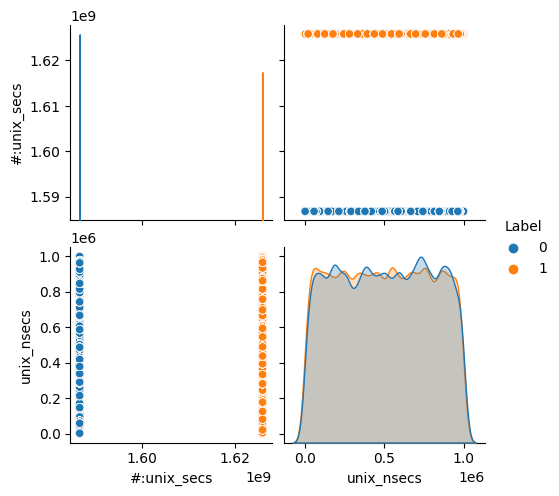

In [ ]:
final_variable='Label'
features_and_target = data[["#:unix_secs", "unix_nsecs",final_variable]]

# Generate pair plot
sns.pairplot(features_and_target, hue=final_variable)
plt.show()

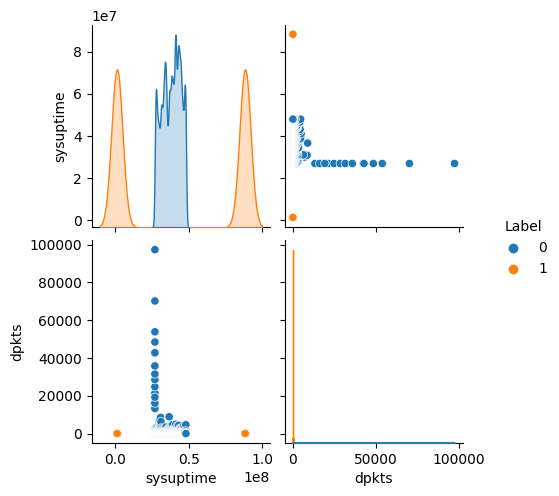

In [ ]:
final_variable='Label'
features_and_target = data[["sysuptime", "exaddr","dpkts",final_variable]]

# Generate pair plot
sns.pairplot(features_and_target, hue=final_variable)
plt.show()

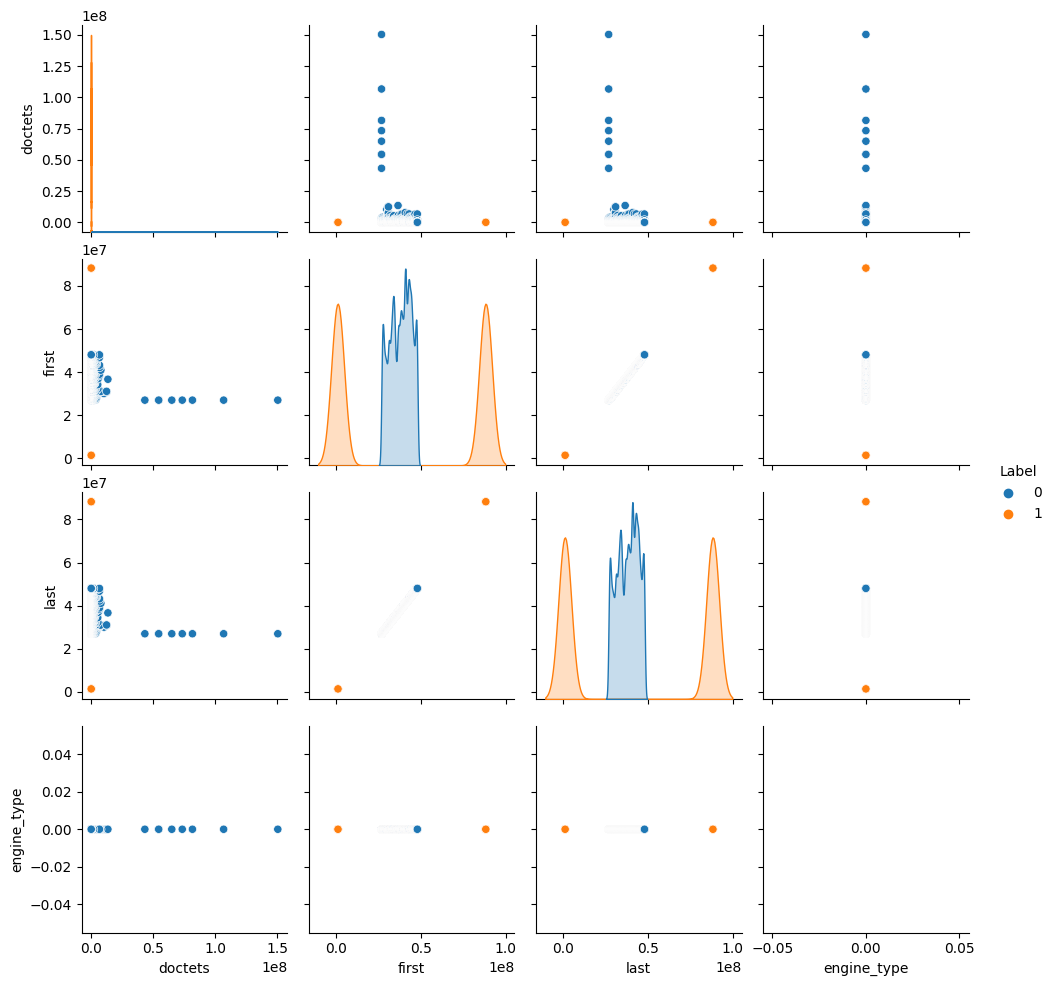

In [ ]:
final_variable='Label'
features_and_target = data[["doctets", "first","last","engine_type",final_variable]]

# Generate pair plot
sns.pairplot(features_and_target, hue=final_variable)
plt.show()

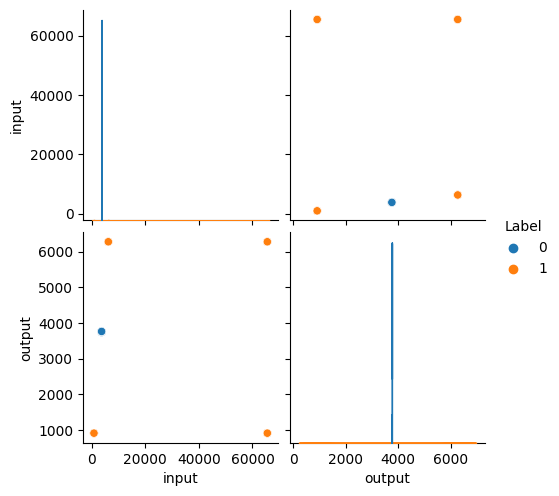

In [ ]:
final_variable='Label'
features_and_target = data[["srcaddr", "dstaddr","nexthop","input","output",final_variable]]

# Generate pair plot
sns.pairplot(features_and_target, hue=final_variable)
plt.show()

In [10]:
# Assuming df is your DataFrame
correlation_matrix = data.corr()
correlation_with_label = correlation_matrix['Label'].abs().sort_values(ascending=False)


<ipython-input-10-4acd672bdb8b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [11]:
correlation_with_label

Label          1.000000
#:unix_secs    0.999999
tcp_flags      0.565177
prot           0.526665
first          0.107055
last           0.106957
sysuptime      0.106935
output         0.044103
input          0.040338
dpkts          0.032123
doctets        0.023535
tos            0.016172
unix_nsecs     0.009748
srcport        0.001086
dstport        0.000191
engine_type         NaN
engine_id           NaN
src_mask            NaN
dst_mask            NaN
src_as              NaN
dst_as              NaN
Name: Label, dtype: float64

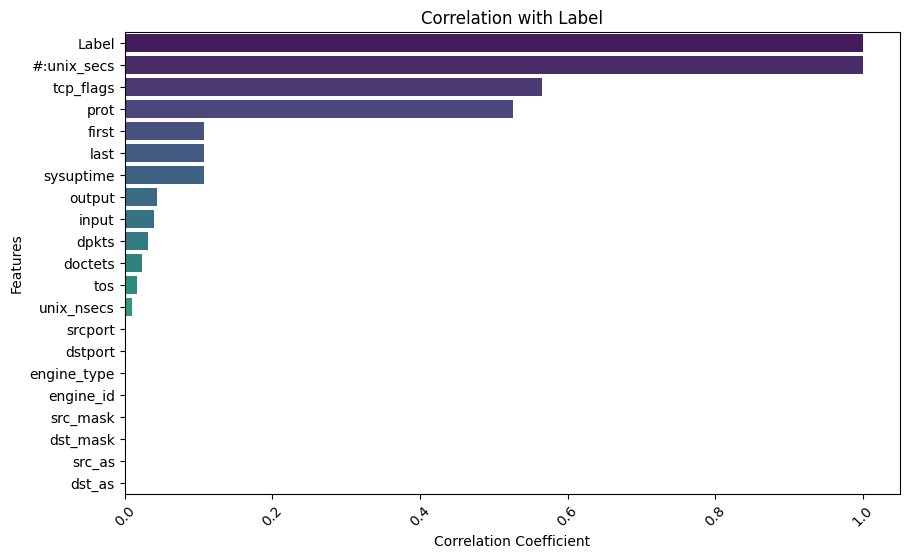

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=correlation_with_label.values,y=correlation_with_label.index,palette='viridis')
plt.xticks(rotation=45)
plt.title('Correlation with Label')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [13]:
#after feature selection
selected_cols=['#:unix_secs','tcp_flags','prot','first','last','sysuptime','output','input','dpkts','doctets','tos','unix_nsecs','Label']
dta=data[selected_cols]

In [14]:
dta

,#:unix_secs,tcp_flags,prot,first,last,sysuptime,output,input,dpkts,doctets,tos,unix_nsecs,Label
0,1625739415,27,6,88050308,88050456,88066836,6273,6273,5,661,0,500239,1
1,1625739415,27,6,88050308,88050456,88066836,6273,6273,5,663,0,500239,1
2,1625739415,27,6,88050316,88050480,88066836,6273,6273,5,661,0,500239,1
3,1625739415,27,6,88050316,88050480,88066836,6273,6273,5,927,0,500239,1
4,1625739415,27,6,88050480,88051480,88066836,6273,6273,5,691,0,500239,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399998,1586809603,0,17,48013136,48013136,48028320,3762,3764,1,81,0,214553,0
399999,1586809603,0,17,48013188,48013188,48028320,3762,3764,1,70,0,214553,0
400000,1586809603,0,17,48013148,48013148,48028320,3764,3762,1,322,0,214553,0
400001,1586809603,0,17,48013164,48013164,48028320,3762,3764,1,81,0,214553,0


In [15]:
data_1=pd.read_csv('/content/drive/MyDrive/SLQ Injection Attack for Test (D2).csv')
data_1.head()

,#:unix_secs,unix_nsecs,sysuptime,exaddr,dpkts,doctets,first,last,engine_type,engine_id,...,srcport,dstport,prot,tos,tcp_flags,src_mask,dst_mask,src_as,dst_as,Label
0,1589041239,886670,69000,152.148.48.1,1,228,53440,53440,0,0,...,53,36602,17,0,0,0,0,0,0,0
1,1589041239,886670,69000,152.148.48.1,1,70,53392,53392,0,0,...,51085,53,17,0,0,0,0,0,0,0
2,1589041239,886670,69000,152.148.48.1,1,70,53428,53428,0,0,...,36602,53,17,0,0,0,0,0,0,0
3,1589041239,886670,69000,152.148.48.1,1,228,53404,53404,0,0,...,53,51085,17,0,0,0,0,0,0,0
4,1589041239,886670,69000,152.148.48.1,1,83,53572,53572,0,0,...,53358,53,17,0,0,0,0,0,0,0


In [16]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57229 entries, 0 to 57228
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   #:unix_secs  57229 non-null  int64 
 1   unix_nsecs   57229 non-null  int64 
 2   sysuptime    57229 non-null  int64 
 3   exaddr       57229 non-null  object
 4   dpkts        57229 non-null  int64 
 5   doctets      57229 non-null  int64 
 6   first        57229 non-null  int64 
 7   last         57229 non-null  int64 
 8   engine_type  57229 non-null  int64 
 9   engine_id    57229 non-null  int64 
 10  srcaddr      57229 non-null  object
 11  dstaddr      57229 non-null  object
 12  nexthop      57229 non-null  object
 13  input        57229 non-null  int64 
 14  output       57229 non-null  int64 
 15  srcport      57229 non-null  int64 
 16  dstport      57229 non-null  int64 
 17  prot         57229 non-null  int64 
 18  tos          57229 non-null  int64 
 19  tcp_flags    57229 non-nu

In [17]:
duplicate_rows_1=data_1[data_1.duplicated()]
duplicate_rows_1

,#:unix_secs,unix_nsecs,sysuptime,exaddr,dpkts,doctets,first,last,engine_type,engine_id,...,srcport,dstport,prot,tos,tcp_flags,src_mask,dst_mask,src_as,dst_as,Label


In [18]:
selected_cols_1=['#:unix_secs','tcp_flags','prot','first','last','sysuptime','output','input','dpkts','doctets','tos','unix_nsecs','Label']
dta_1=data_1[selected_cols_1]
dta_1

,#:unix_secs,tcp_flags,prot,first,last,sysuptime,output,input,dpkts,doctets,tos,unix_nsecs,Label
0,1589041239,0,17,53440,53440,69000,8,10,1,228,0,886670,0
1,1589041239,0,17,53392,53392,69000,10,8,1,70,0,886670,0
2,1589041239,0,17,53428,53428,69000,10,8,1,70,0,886670,0
3,1589041239,0,17,53404,53404,69000,8,10,1,228,0,886670,0
4,1589041239,0,17,53572,53572,69000,10,8,1,83,0,886670,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57224,1625730638,25,6,79281992,79281996,79318080,4851,65535,11,812,8,242415,1
57225,1625730638,26,6,79281940,79281992,79318080,65535,4851,36,6370,0,242415,1
57226,1625730638,26,6,79281940,79281992,79318080,4851,65535,27,3337,0,242415,1
57227,1625730638,26,6,79287916,79288000,79318080,4851,4851,18,3185,0,242415,1


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df_train=dta
df_test=dta_1

In [20]:
df_train.iloc[:, :-1]

,#:unix_secs,tcp_flags,prot,first,last,sysuptime,output,input,dpkts,doctets,tos,unix_nsecs
0,1625739415,27,6,88050308,88050456,88066836,6273,6273,5,661,0,500239
1,1625739415,27,6,88050308,88050456,88066836,6273,6273,5,663,0,500239
2,1625739415,27,6,88050316,88050480,88066836,6273,6273,5,661,0,500239
3,1625739415,27,6,88050316,88050480,88066836,6273,6273,5,927,0,500239
4,1625739415,27,6,88050480,88051480,88066836,6273,6273,5,691,0,500239
...,...,...,...,...,...,...,...,...,...,...,...,...
399998,1586809603,0,17,48013136,48013136,48028320,3762,3764,1,81,0,214553
399999,1586809603,0,17,48013188,48013188,48028320,3762,3764,1,70,0,214553
400000,1586809603,0,17,48013148,48013148,48028320,3764,3762,1,322,0,214553
400001,1586809603,0,17,48013164,48013164,48028320,3762,3764,1,81,0,214553


In [21]:
df_train.iloc[: ,-1:]

,Label
0,1
1,1
2,1
3,1
4,1
...,...
399998,0
399999,0
400000,0
400001,0


In [22]:
X_train=df_train.iloc[:, :-1]
y_train=df_train.iloc[: ,-1:]
X_test=df_test.iloc[:, :-1]
y_test=df_test.iloc[: ,-1:]

In [23]:
model=LogisticRegression(solver='liblinear',penalty='l1',C=0.1)
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [24]:
coefficients = model.coef_[0]
print(coefficients)

[ 8.90843891e-10  2.76692287e-01 -2.92175016e-01  6.16267388e-08
  6.71016860e-08  5.89297061e-08 -1.68085081e-03 -1.35491870e-03
 -3.25604406e-01 -1.02880122e-04  1.47222016e-02 -1.49137693e-07]


In [25]:
y_pred=model.predict(X_test)

In [26]:
from sklearn.metrics import roc_auc_score
c_statistic=roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print(c_statistic*100)

93.504071454937


In [27]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)

81.36783798423876


In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,random_state=42)
rf.fit(X_train,y_train)

<ipython-input-41-f2fcf8ef3241>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

In [42]:
y_pred_rf=rf.predict(X_test)

In [43]:
from sklearn.metrics import roc_auc_score
c_statistic=roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
print(c_statistic*100)

99.99987023528547


In [44]:
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print(accuracy_rf*100)

72.96475563088643


In [33]:
print(y_test.shape)
print(y_pred.shape)

(57229, 1)
(57229,)


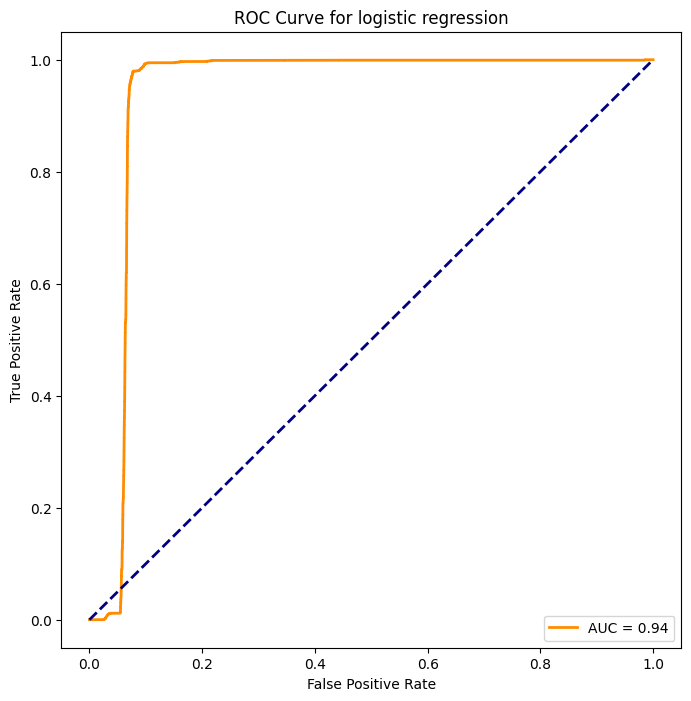

In [35]:
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for logistic regression')
plt.legend(loc='lower right')
plt.show()

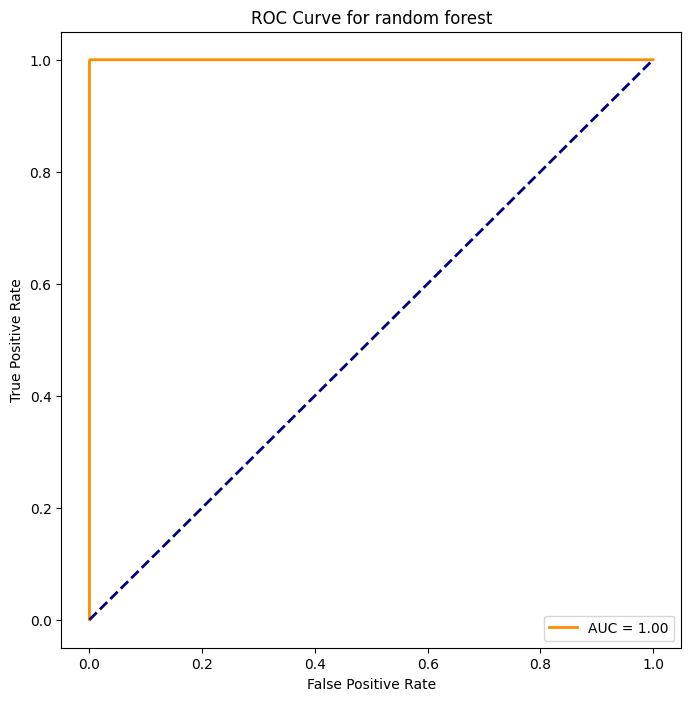

In [45]:
from sklearn.metrics import roc_curve, auc
y_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for random forest')
plt.legend(loc='lower right')
plt.show()

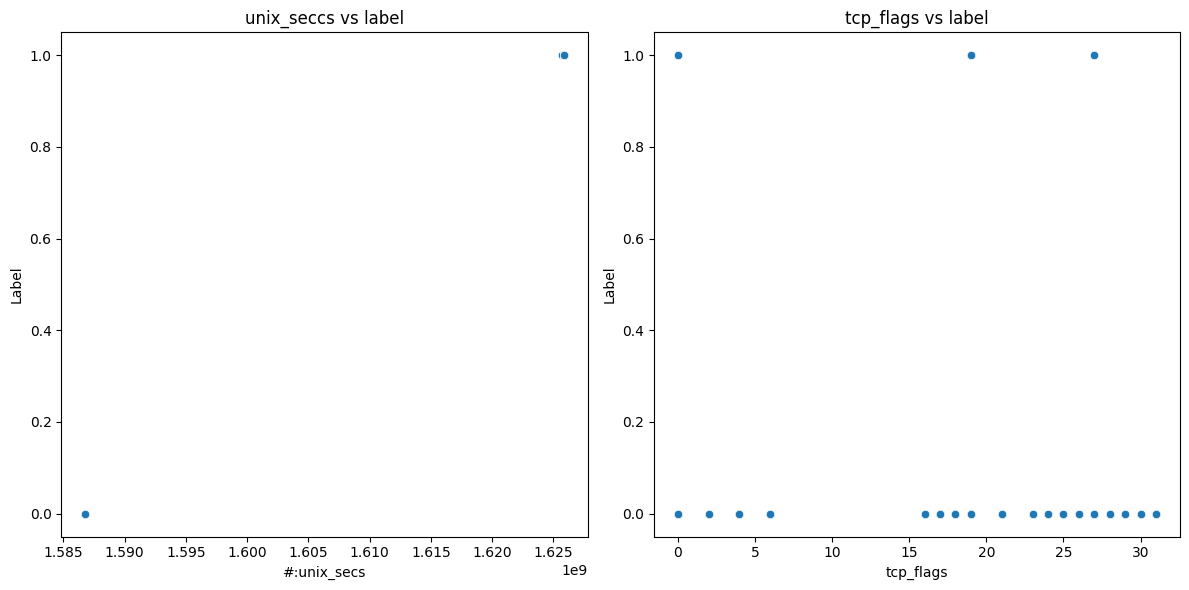

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x='#:unix_secs',y='Label',data=dta)
plt.title('unix_seccs vs label')
plt.subplot(1,2,2)
sns.scatterplot(x='tcp_flags',y='Label',data=dta)
plt.title('tcp_flags vs label')
plt.tight_layout()
plt.show()